DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔型值）。DataFrame 既有行索引也有列索引，它可以被看做由 Series 组成的字典（共同用一个索引）。
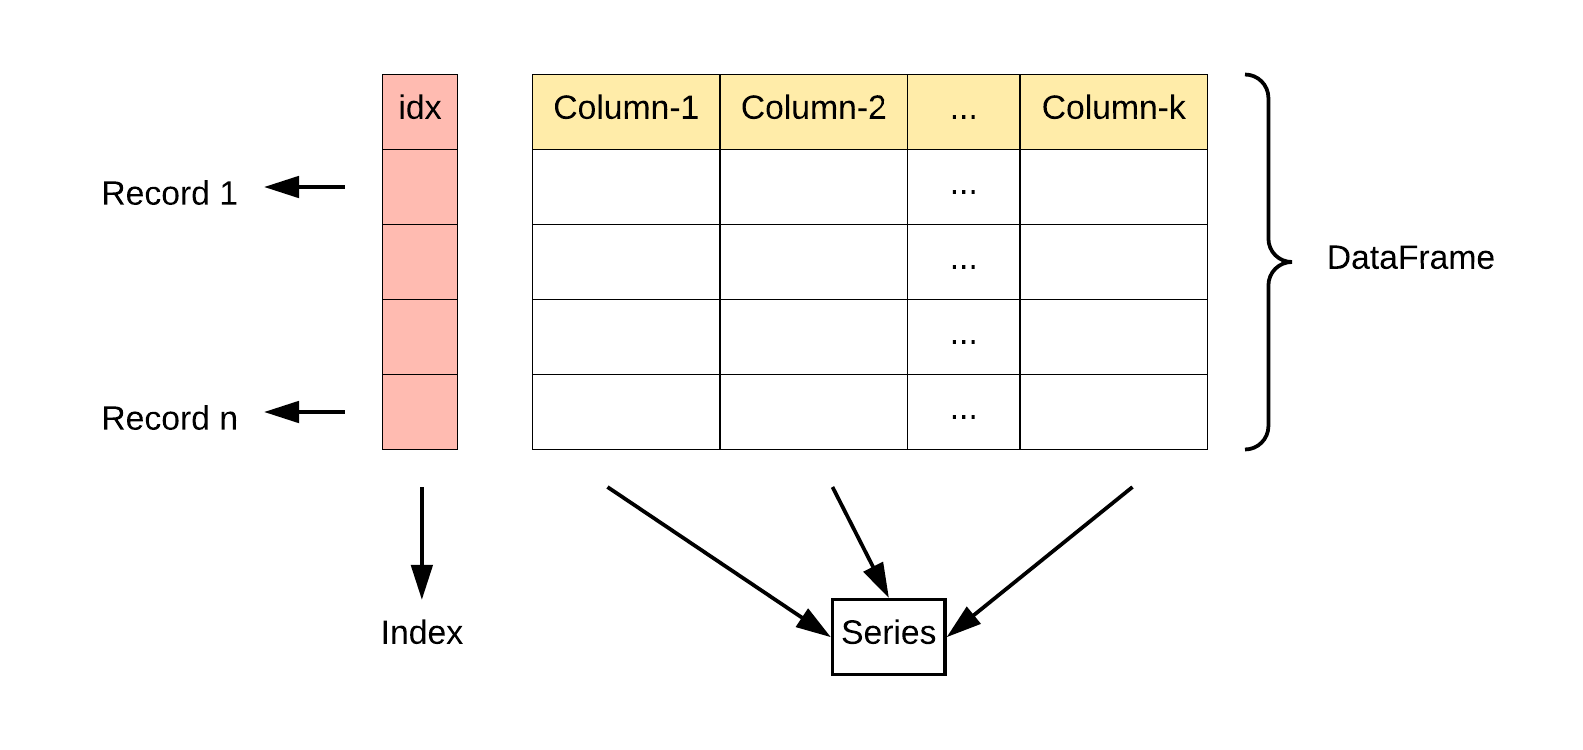
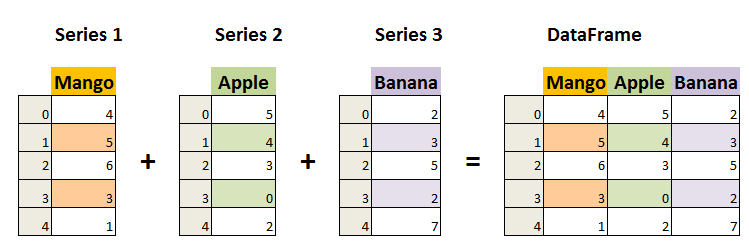

DataFrame 构造方法如下：

pandas.DataFrame( data, index, columns, dtype, copy)
参数说明：

data：一组数据(ndarray、series, map, lists, dict 等类型)。

index：索引值，或者可以称为行标签。

columns：列标签，默认为 RangeIndex (0, 1, 2, …, n) 。

dtype：数据类型。

copy：拷贝数据，默认为 False。

Pandas DataFrame 是一个二维的数组结构，类似二维数组。

In [4]:
# 实例 - 使用列表创建
import pandas as pd
 
data=[['Google',10],['Runoob',12],['Wiki',13]]
df=pd.DataFrame(data,columns=["Site","Age"])

print(df)

     Site  Age
0  Google   10
1  Runoob   12
2    Wiki   13


以下实例使用 ndarrays 创建，ndarray 的长度必须相同， 如果传递了 index，则索引的长度应等于数组的长度。如果没有传递索引，则默认情况下，索引将是range(n)，其中n是数组长度。

In [6]:
# 实例 - 使用 ndarrays 创建
import pandas as pd

data = {'Site':['Google', 'Runoob', 'Wiki'], 'Age':[10, 12, 13]}

df=pd.DataFrame(data)

print(df)

     Site  Age
0  Google   10
1  Runoob   12
2    Wiki   13


还可以使用字典（key/value），其中字典的 key 为列名:

In [7]:
# 实例 - 使用字典创建
import pandas as pd

data=[{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df=pd.DataFrame(data)

print(df)

   a   b     c
0  1   2   NaN
1  5  10  20.0


没有对应的部分数据为 NaN。

Pandas 可以使用 loc 属性返回指定行的数据，如果没有设置索引，第一行索引为 0，第二行索引为 1，以此类推：

实例

In [9]:
import pandas as pd

data={
    "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

# 数据载入到 DataFrame 对象
df=pd.DataFrame(data)

# 返回第一行
print(df.loc[0])

# 返回第二行
print(df.loc[1])

calories    420
duration     50
Name: 0, dtype: int64
calories    380
duration     40
Name: 1, dtype: int64


注意：返回结果其实就是一个 Pandas Series 数据。

也可以返回多行数据，使用 [[ ... ]] 格式，... 为各行的索引，以逗号隔开：

In [10]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

# 数据载入到 DataFrame 对象
df = pd.DataFrame(data)
# 返回第一行和第二行
print(df.loc[[0, 1]])

   calories  duration
0       420        50
1       380        40


注意：返回结果其实就是一个 Pandas DataFrame 数据。

我们可以指定索引值，如下实例：

In [11]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])

print(df)

      calories  duration
day1       420        50
day2       380        40
day3       390        45


Pandas 可以使用 loc 属性返回指定索引对应到某一行：

In [12]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])

# 指定索引
print(df.loc["day2"])

calories    380
duration     40
Name: day2, dtype: int64


这里教程没有写如何获取 dataframe 中其中几列，我来补充一下。

当处理数据时候 series 较多而我们其中只关注其中一些特定的列时候可以使用。

假设：

In [13]:
data = {
  "mango": [420, 380, 390],
  "apple": [50, 40, 45],
  "pear": [1, 2, 3],
  "banana": [23, 45,56]
}

df=pd.DataFrame(data)

print(df[["mango","banana"]])

   mango  banana
0    420      23
1    380      45
2    390      56


In [14]:
import pandas as pd
# numpy
data1 = {'C': ['Google', 'Runoob'], 'A': [10, 12], 'B': [93.5, 89]}
df1 = pd.DataFrame(data1)
print(df1)

# dict
data2 = [{'C': 'Google', 'A': 10, 'B': 93.5}, {'C': 'Runoob', 'A': 12, 'B': 89}]
df2 = pd.DataFrame(data2)
print(df2)

        C   A     B
0  Google  10  93.5
1  Runoob  12  89.0
        C   A     B
0  Google  10  93.5
1  Runoob  12  89.0


当运用 numpy 或者字典创建时，是按关键词顺序（'A'<'B'<'C'）输出的，而不是按照书写的先后顺序。

补充一下，如何先添加新列。添加一新列，名字为sum，每行的总和。

In [15]:
data = {
  "mango": [420, 380, 390],
  "apple": [50, 40, 45],
  "pear": [1, 2, 3],
  "banana": [23, 45,56]
}
df = pd.DataFrame(data)
df["sum"]=df['mango']+df['apple']+df['pear']+df['banana']
print(df)

   mango  apple  pear  banana  sum
0    420     50     1      23  494
1    380     40     2      45  467
2    390     45     3      56  494


In [16]:
df['sum']=df.mango+df.apple+df.pear+df.banana
print(df)

   mango  apple  pear  banana  sum
0    420     50     1      23  494
1    380     40     2      45  467
2    390     45     3      56  494


补充一下，如何修改某一列特定几行元素的值：

In [21]:
data = {
  "mango": [420, 380, 390],
  "apple": [50, 40, 45],
  "pear": [1, 2, 3],
  "banana": [23, 45,56],
  "type":['Truck','Van','Tram']
}
df = pd.DataFrame(data)

print(df)

"""
代码首先使用 isin() 方法返回一个布尔数组，该数组指示哪些行的 type 值等于 "Truck"、"Van" 或 "Tram"。
然后，loc 方法使用这个布尔数组和列标签 "type" 来定位符合条件的行和列。最后，将这些行的 type 值修改为 "Car"。
"""
# 修改某一列特定几行元素的值
array=df.type.isin(["Truck","Tram","Van"])
print(array)
df.loc[array,"type"]="Car"
print(df)


   mango  apple  pear  banana   type
0    420     50     1      23  Truck
1    380     40     2      45    Van
2    390     45     3      56   Tram
0    True
1    True
2    True
Name: type, dtype: bool
   mango  apple  pear  banana type
0    420     50     1      23  Car
1    380     40     2      45  Car
2    390     45     3      56  Car
0    False
1    False
2    False
Name: type, dtype: bool
   mango  apple  pear  banana type
0    420     50     1      23  Car
1    380     40     2      45  Car
2    390     45     3      56  Car


In [22]:
data = {
  "mango": [420, 380, 390],
  "apple": [50, 40, 45],
  "pear": [1, 2, 3],
  "banana": [23, 45,56],
  "type":['Truck','Van','Tram']
}
df = pd.DataFrame(data)

print(df)

"""
代码首先使用 isin() 方法返回一个布尔数组，该数组指示哪些行的 type 值等于 "Truck"、"Van" 或 "Tram"。
然后，loc 方法使用这个布尔数组和列标签 "type" 来定位符合条件的行和列。最后，将这些行的 type 值修改为 "Car"。
"""
# 修改某一列特定几行元素的值
array=df.type.isin(["Truck","Tram"])
print(array)
df.loc[array,"type"]="Car"
print(df)


   mango  apple  pear  banana   type
0    420     50     1      23  Truck
1    380     40     2      45    Van
2    390     45     3      56   Tram
0     True
1    False
2     True
Name: type, dtype: bool
   mango  apple  pear  banana type
0    420     50     1      23  Car
1    380     40     2      45  Van
2    390     45     3      56  Car
